<b>Bibliotecas</b>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from datetime import date, datetime
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

<b>API: COVID-19</b>

In [2]:
url = "https://coronavirus-map.p.rapidapi.com/v1/spots/summary"

headers = {
    'x-rapidapi-host': "coronavirus-map.p.rapidapi.com",
    'x-rapidapi-key': "92274cb262msh0708e2c597ea8bfp1f38e4jsn852f247bcc87"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{"status":200,"type":"collection","elements":178,"data":{"2020-07-16":{"total_cases":13970112,"active_cases":5082850,"deaths":591998,"recovered":8295264,"critical":59736,"tested":265996589,"death_ratio":0.04237603821644379,"recovery_ratio":0.5937865065076071},"2020-07-15":{"total_cases":13752395,"active_cases":5035184,"deaths":586843,"recovered":8130368,"critical":59470,"tested":262801756,"death_ratio":0.04267205821240591,"recovery_ratio":0.5911965152251663},"2020-07-14":{"total_cases":13529076,"active_cases":4989334,"deaths":581109,"recovered":7958633,"critical":59206,"tested":260452752,"death_ratio":0.04295260075410915,"recovery_ratio":0.588261386069529},"2020-07-13":{"total_cases":13309624,"active_cases":4951183,"deaths":575824,"recovered":7782617,"critical":58669,"tested":258351312,"death_ratio":0.04326373156747328,"recovery_ratio":0.5847360526488201},"2020-07-12":{"total_cases":13106689,"active_cases":4916159,"deaths":571823,"recovered":7618707,"critical":58722,"tested":254931077,

In [3]:
val = literal_eval(response.text)
df_cases = pd.DataFrame.from_dict(val).reset_index().rename(columns={'index': 'day'}).drop(columns=['status', 'type', 'elements'])
df_cases['active_cases'] = 0
df_cases['total_cases'] = 0
df_cases['deaths'] = 0
for item in range(len(df_cases)):
    df_cases['active_cases'][item] =  df_cases['data'][item].get('active_cases')
    df_cases['total_cases'][item] =  df_cases['data'][item].get('total_cases')
    df_cases['deaths'][item] = df_cases['data'][item].get('deaths')

df_cases = df_cases.drop(columns=['data'])
mask = (df_cases['day']== '2020-01-01') | (df_cases['day']== '2020-02-01') | (df_cases['day']== '2020-03-01') | (df_cases['day']== '2020-04-01') | (df_cases['day']== '2020-05-01') | (df_cases['day']== '2020-06-01')
df_cases_day = df_cases[mask].reset_index(drop=True)
df_cases_day

C:\Users\yukar\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\yukar\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yukar\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,day,active_cases,total_cases,deaths
0,2020-02-01,11779,12038,259
1,2020-03-01,85373,88369,2996
2,2020-04-01,885796,932605,46809
3,2020-05-01,2080267,3405626,239758
4,2020-06-01,3092225,6376169,377515


In [60]:
df_cases

,day,active_cases,total_cases,deaths
0,2020-01-21,0,0,0
1,2020-01-22,538,555,17
2,2020-01-23,636,654,18
3,2020-01-24,915,941,26
4,2020-01-25,1392,1434,42
...,...,...,...,...
173,2020-07-12,4916159,13106689,571823
174,2020-07-13,4951183,13309624,575824
175,2020-07-14,4989334,13529076,581109
176,2020-07-15,5035184,13752395,586843


<b>API: Quantidade de acessos - Netflix</b>

In [4]:
url = "https://similarweb2.p.rapidapi.com/trafficoverview"

querystring = {"website":"https://www.netflix.com"}

headers = {
    'x-rapidapi-host': "similarweb2.p.rapidapi.com",
    'x-rapidapi-key': "92274cb262msh0708e2c597ea8bfp1f38e4jsn852f247bcc87"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"engagement":{"avgVisitDuration":585,"bounceRate":0.4343,"pagesPerVisit":4.25,"totalVisits":2528200000},"monthlyVisitsEstimate":{"2020-01-01":2388000000,"2020-02-01":2003000000,"2020-03-01":2524000000,"2020-04-01":2967000000,"2020-05-01":2795000000,"2020-06-01":2528000000},"name":"netflix.com","trafficShareByCountry":[{"United States":0.2596},{"Brazil":0.0677},{"United Kingdom":0.0555},{"Canada":0.0528},{"France":0.0355}],"trafficSources":{"Direct":0.8729,"Mail":0.0186,"Paid Referrals":0.0003,"Referrals":0.0018,"Search":0.084,"Social":0.022}}



In [5]:
netflix = literal_eval(response.text)
month_netflix = netflix.get('monthlyVisitsEstimate')
df_netflix = pd.DataFrame.from_dict(month_netflix, orient='index').reset_index().rename(columns={'index':'Data', 0: "Qtd_Acessos"})
mask = df_netflix['Data'] != '2020-01-01'
df_netflix = df_netflix[mask]
df_netflix

,Data,Qtd_Acessos
1,2020-02-01,2003000000
2,2020-03-01,2524000000
3,2020-04-01,2967000000
4,2020-05-01,2795000000
5,2020-06-01,2528000000


In [32]:
country_netflix = youtube.get("trafficShareByCountry")
df_p_netflix = pd.DataFrame(country_netflix).T
df_p_netflix['country_acessos'] = df_p_netflix.T.sum()
df_p_netflix = df_p_netflix.drop(columns=[0, 1, 2, 3, 4]).reset_index().rename(columns={'index':'country'})
df_p_netflix

,country,country_acessos
0,United States,0.2020
1,Russian Federation,0.0534
2,Brazil,0.0511
3,United Kingdom,0.0389
4,India,0.0352


<b>API: Quantidade de acessos - Youtube</b>

In [6]:
url = "https://similarweb2.p.rapidapi.com/trafficoverview"

querystring = {"website":"https://www.youtube.com"}

headers = {
    'x-rapidapi-host': "similarweb2.p.rapidapi.com",
    'x-rapidapi-key': "92274cb262msh0708e2c597ea8bfp1f38e4jsn852f247bcc87"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"engagement":{"avgVisitDuration":1329,"bounceRate":0.2525,"pagesPerVisit":9.28,"totalVisits":31052000000},"monthlyVisitsEstimate":{"2020-01-01":29530000000,"2020-02-01":27360000000,"2020-03-01":31340000000,"2020-04-01":33380000000,"2020-05-01":33540000000,"2020-06-01":31050000000},"name":"youtube.com","trafficShareByCountry":[{"United States":0.202},{"Russian Federation":0.0534},{"Brazil":0.0511},{"United Kingdom":0.0389},{"India":0.0352}],"trafficSources":{"Direct":0.7234,"Mail":0.0222,"Paid Referrals":0.0006,"Referrals":0.016,"Search":0.2004,"Social":0.0371}}



In [7]:
youtube = literal_eval(response.text)
month_youtube = youtube.get('monthlyVisitsEstimate')
df_youtube = pd.DataFrame.from_dict(month_youtube, orient='index').reset_index().rename(columns={'index':'Data', 0: "Qtd_Acessos"})
mask = df_youtube['Data'] != '2020-01-01'
df_youtube = df_youtube[mask]
df_youtube

,Data,Qtd_Acessos
1,2020-02-01,27360000000
2,2020-03-01,31340000000
3,2020-04-01,33380000000
4,2020-05-01,33540000000
5,2020-06-01,31050000000


In [29]:
country_youtube = youtube.get("trafficShareByCountry")
df_p_youtube = pd.DataFrame(country_youtube).T
df_p_youtube['country_acessos'] = df_p_youtube.T.sum()
df_p_youtube = df_p_youtube.drop(columns=[0, 1, 2, 3, 4]).reset_index().rename(columns={'index':'country'})
df_p_youtube

,country,country_acessos
0,United States,0.2020
1,Russian Federation,0.0534
2,Brazil,0.0511
3,United Kingdom,0.0389
4,India,0.0352


<b>Base de dados</b>

In [38]:
acessos = pd.merge(df_netflix, df_youtube, on='Data', how='left', suffixes=('_netflix', '_youtube')).reset_index(drop=True)
acessos

,Data,Qtd_Acessos_netflix,Qtd_Acessos_youtube
0,2020-02-01,2003000000,27360000000
1,2020-03-01,2524000000,31340000000
2,2020-04-01,2967000000,33380000000
3,2020-05-01,2795000000,33540000000
4,2020-06-01,2528000000,31050000000


In [46]:
df_cases_day.to_csv('cases.csv')
acessos.to_csv('acessos.csv')
df_p_youtube.to_csv('paises_youtube.csv')
df_p_netflix.to_csv('paises_netflix.csv')

In [47]:
df_cases_day['day']

0    2020-02-01
1    2020-03-01
2    2020-04-01
3    2020-05-01
4    2020-06-01
Name: day, dtype: object

<b>Gráficos<b>

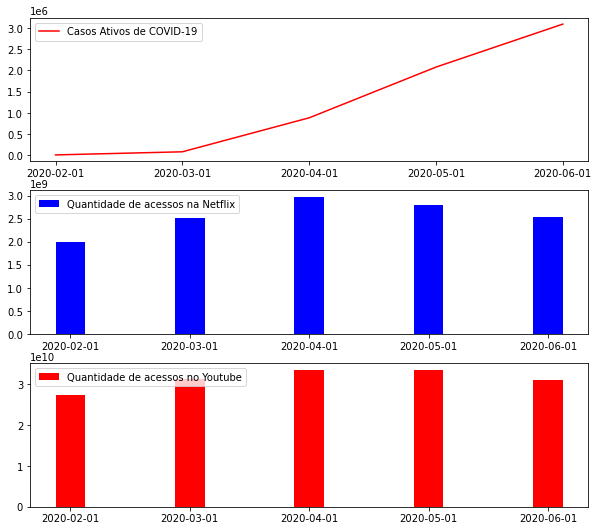

In [59]:
fig, ax = plt.subplots(3, 1, figsize=(10,9))
ax[0].plot(df_cases_day['day'], df_cases_day['active_cases'], 'r-')
ax[0].legend(['Casos Ativos de COVID-19'])

ax[1].bar(df_netflix['Data'], df_netflix['Qtd_Acessos'], width=0.25, color = 'b')
ax[1].legend(['Quantidade de acessos na Netflix'])

ax[2].bar(df_youtube['Data'], df_youtube['Qtd_Acessos'], width=0.25, color = 'r')
ax[2].legend(['Quantidade de acessos no Youtube'])
plt.show()